# Actividad 1

**Minería de Datos**

Equipo 8

- Martínez Ostoa, Néstor Iván
- Padilla Robles, Artemio Santiago
- Ramírez Bondi, Jorge Alejandro

## 1. Contexto

A partir de la descripción del problema y su contexto derivado:

> La industria de la confección es uno de los ejemplos clave de la globalización industrial de esta era moderna. Es una industria que requiere mucha mano de obra y muchos procesos manuales. Satisfacer la enorme demanda mundial de productos de confección depende principalmente del rendimiento de producción y entrega de los empleados de las empresas de fabricación de prendas de vestir. Por lo tanto, es muy deseable entre los tomadores de decisiones en la industria de la confección rastrear, analizar y predecir el desempeño de la productividad de los equipos de trabajo en sus fábricas.

El equipo llegó a analizar las implicaciones del tipo de industria con la que se está trabajando y las implicaciones que sus características tienen sobre las posibles ideas de solución. Producto de la globalización, las industrias—en particular la textil—han sufrido cambios significativos que han llevado a que los procesos productivos aumenten su productividad y eficiencia. Lo anterior, a pesar de que se han incrementado los procesos automatizados, sin necesariamente eliminar por completo la necesidad de contar con mano de obra.

Lo anterior ha derivado en un aumento en la complejidad de coordinación entre las distintas etapas de fabricación, distribución y venta. Por lo cual, es primordial contar con información verídica que nos permita analizar el desempeño y comportamiento de la productividad de cada una de las fábricas o unidades productivas de la industria.

Finalmente, esta serie de condiciones han provocado que se utilicen bases de datos que contengan los atributos más importantes—mismos que permiten calificar el rendimiento de una unidad productiva—para validar, con expertos en la materia, y así realizar análisis en la productividad de las fábricas. Por ello, proponemos realizar un análisis de regresión sobre los datos proporcionados para generar un modelo que nos permita estimar la productividad final según los parámetros proporcionados y establecer un marco de referencia que permita tomar mejores decisiones para aumentar la eficiencia de cada una de las unidades productivas pertenecientes a la cadena de la industria textil.

## 2. Objetivo del negocio

- A partir de una base de datos, rastrear, analizar y predecir el desempeño en la productividad de los equipos de trabajo ubicados en las distintas fábricas pertenecientes a la industria textil.

- Utilizar el modelo de predicción antes mencionado para mejorar los distintos procesos de fabricación y aumentar la productividad de la unidad de fabricación al realizar los ajustes necesarios.

- Entender de mejor manera qué procesos y variables afectan de manera más significativa las variables de rendimiento o productividad entre los distintos equipos de trabajo ubicados en las fábricas.

## 3. Posibles criterios de satisfacción del negocio

A partir de los cambios propuestos con los resultados obtenidos mediante el modelo previamente descrito:
- Lograr un incremento de la productividad real en cinco (5) puntos porcentuales en el trimestre subsecuente inmediato
- Preferentemente, lograr las mejoras en los índices de productividad sin necesariamente incrementar las horas de trabajo extra realizadas por los trabajadores
- Conseguir un mejor entendimiento de aquellas variables que incrementen y reduzcan el rendimiento de los equipos de trabajo para proponer cambios en las condiciones de trabajo que mejoren la rentabilidad de los procesos productivos

## 4. Ideas de solución

Considerando el contexto, objetivos y criterios de satisfacción del negocio, se propone realizar un análisis exploratorio de los datos disponibles, para después generar un modelo que permita clasificar y, si se considera necesario, ordenar las variables relacionadas con la productividad de los distintos equipos de trabajo en la industria. Para ello, se propone generar una muestra gráfica del comportamiento y correlación de los datos, reducir las variables que permiten describir la variable objetivo (productividad real) y generar un modelo de regresión lineal que permitan predecir la productividad que tendrá un equipo con base en los valores asignados a las distintas variables de entrada.

Lo anterior, nos permitirá determinar qué es lo que afecta la productividad de un equipo en la industria textil con tal de proponer soluciones y cambios en las condiciones y ambiente en el que se desarrollan los trabajadores para mejorar los réditos de las fábricas maquiladoras.


## 5. Análisis exploratorio e interpretación de los datos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder

url = "https://raw.githubusercontent.com/ArtemioPadilla/LCD/main/semestres/3/DataMining/tareas/IndustriaTextil.csv?token=AOBD75TGPK4UC6WG7F6F6ALBGVO6S"

df = pd.read_csv(url)
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


### 5.1 Exploramos el dataframe

En este análisis lo que buscamos es lo siguiente:
1. **Identificación de posibles campos nulos**
2. **Análisis estadístico básico de todos los valores**
3. **Identificación de variables (categóricas, numéricas, ...) junto con su tipo de dato**.

In [ ]:
#--------------------------------------------------------
# 5.1.1 Identificación de posibles campos nulos
#--------------------------------------------------------
print(f'Total de valores: {df.shape[0]}')
df.isna().sum()

Total de valores: 1197


date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

- Podemos observar que la variable ```wip``` tiene $506$ datos nulos, posteriormente haremos un análisis más detallado
- Sin embargo, podemos notar que la cantidad de valores nulos en ```wip``` es significativa, pues representa un $42.27\%$ faltante del total.

In [ ]:
#--------------------------------------------------------
# 5.1.2 Análisis estadístico básico de todos los valores
#--------------------------------------------------------
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


De este breve análisis estadístico, destacamos lo siguiente:
1. La productividad objetivo ```targeted_productivity``` tiene una media prácticamente idéntica a la productividad actual ```actual_productivity```: $$\mu_{tp} = 0.7296 \quad\quad vs\quad\quad \mu_{ap} = 0.7350$$
2. Sin embargo, las desviaciones estándas sí varían más: $$S_{tp} = 0.0978 \quad\quad vs\quad\quad S_{ap} = 0.1744$$
3. Los tiempos asignados para cada tarea ```smv``` se encuentran en un rango entre $2.9$ y $54.6$ minutos
4. En ```wip``` cabe destacar que existe un equipo con $23,122$ tareas por terminar y, en contraposición, existe un equipo con $7$ 
5. En promedio, cada equipo ha trabajado $4,568$ minutos extra pero con una desviación estándar de $3,349$ minutos, lo cual nos habla de equipos que trabajan —en acumulado— mucho más minutos extra
6. En ```incentive```, ```idle_time```, ```idle_men``` y ```no_of_style_change``` cabe destacar que hay una gran presencia de ceros
7. En ```no_of_workers``` podemos observar que el equipo con menos integrantes cuenta con tan solo $2$ personas y el equipo de mayor integrantes cuenta con $89$ personas. La media del número de personas por equipo es de $35$ con una desviación estándar de $22$.



In [ ]:
#-------------------------------------------------------------------------------
# 5.1.3 Identificación de variables (categóricas, numéricas, ...) junto con su 
# tipo de dato
#-------------------------------------------------------------------------------
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [ ]:
print(f'Valores únicos almacenados en la variable quarter:\n{df["quarter"].unique()}\n')
print(f'Valores únicos almacenados en la variable department:\n{df["department"].unique()}\n')
print(f'Valores únicos almacenados en la variable de día:\n{df["day"].unique()}\n')
print(f'Valores únicos almacenados en la variable team:\n{df["team"].unique()}\n')
print(f'Valores únicos almacenados en la variable over_time:\n{df["over_time"].unique()[:10]}\n')
print(f'Valores únicos almacenados en la variable incentive:\n{df["incentive"].unique()[:10]}\n')
print(f'Valores únicos almacenados en la variable idle_men:\n{df["idle_men"].unique()[:10]}\n')
print(f'Valores únicos almacenados en la variable no_of_style_change:\n{df["no_of_style_change"].unique()[:10]}\n')
print(f'Valores únicos almacenados en la variable no_of_workers:\n{df["no_of_workers"].unique()}\n')

Valores únicos almacenados en la variable quarter:
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']

Valores únicos almacenados en la variable department:
['sweing' 'finishing ' 'finishing']

Valores únicos almacenados en la variable de día:
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

Valores únicos almacenados en la variable team:
[ 8  1 11 12  6  7  2  3  9 10  5  4]

Valores únicos almacenados en la variable over_time:
[7080  960 3660 1920 6720 6900 6000 6480 2160 7200]

Valores únicos almacenados en la variable incentive:
[98  0 50 38 45 34 44 63 56 40]

Valores únicos almacenados en la variable idle_men:
[ 0 10 15 45 37 30 35 20 25 40]

Valores únicos almacenados en la variable no_of_style_change:
[0 1 2]

Valores únicos almacenados en la variable no_of_workers:
[59.   8.  30.5 56.  57.5 55.  54.  18.  60.  12.  20.  17.  56.5 54.5
 29.5 31.5 31.  55.5 58.  10.  16.  32.  58.5 15.   5.  57.  53.  51.5
  2.   9.   7.  19.  28.  34.  89.  14.  25.  52.  

**Variables categóricas ordinales**:
1. ```date```
2. ```quarter```
3. ```day```

**Variables categóricas nominales**:
1. ```department```

**Variables numéricas discretas**:
1. ```team```
2. ```over_time```
3. ```incentive```
4. ```idle_men```
5. ```no_of_style_change```
6. ```no_of_workers```*

**Variables numéricas continuas**:
1. ```targeted_productivity```
2. ```smv```
3. ```wip```
4. ```idle_time```
5. ```actual_productivity```

- **Se observa que la variable `date` no cuenta con reportes en los días viernes.**
- **Cabe mencionar que la variable ```no_of_workers``` debería ser una variable numérica discreta, sin embargo, en el dataset hay valores decimales presentes lo cual no tiene sentido físico.**

### Funciones básicas para el análisis de cada variable

In [ ]:
blue_color = '#90e0ef'

def graph_two_vars(var1, var2, df):
    col1 = df[var1]
    col2 = df[var2]
    corr = np.round(df.corr()[var1].loc[var2],4)
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=col1.values,
        y=col2.values,
        mode='markers',
        marker_color=blue_color
    ))
    fig.update_layout(
        title=dict(
            text=f'<b>{var1} vs {var2}</b><br>coeficiente de correlación {corr}',
            font=dict(
                size=12
            )
        ),
        width=600, height=400, template='plotly_white'
    )
    fig.update_xaxes(title_text=var1)
    fig.update_yaxes(title_text=var2)
    fig.show()

def get_histogram(variable, df):
    col = df[variable]
    fig = go.Figure()
    fig.add_trace(
        go.Histogram(
            x=col.values, marker_color=blue_color
        )
    )
    # fig = ff.create_distplot(
    #     [col.values], bin_size=0.2, group_labels=[0], show_rug=False
    # )
    fig.update_layout(
        title=dict(text=f'Histograma para {variable}<br>{col.shape[0]} valores'),
        width=600, height=400, template='plotly_white'
    )
    fig.show()

def basic_var_description(variable, df):
    print(f"---------------{variable}---------------")
    col = df[variable]
    print(f'Tipo de dato:\t{col.dtype}\n')
    if col.unique().shape[0] < 20:
        print(f'Valores únicos:\t{sorted(col.unique())}\n')
    else:
        unique_vals = np.around(sorted(col.unique()), decimals=6)
        print(f'Valores únicos ({col.unique().shape[0]}):\n\t{unique_vals[:10]}\n\t...\n\t{unique_vals[-10:]}')

    print(f'Valores nulos:\t{col.isna().sum()}\n')
    print(f'Estadísticas de la variable:\n{col.describe()}\n')
    print("Histograma:\n")
    get_histogram(variable, df)
    if variable != 'actual_productivity':
      print("Correlación con la productividad:\n")
      graph_two_vars(variable, 'actual_productivity', df)

### 5.7 Exploremos ```no_of_style_change```

Esta variable representa -según el diccionario de datos- el número de cambios en el estilo de un producto en particular. Podríamos pensar originalmente que esta variable tiene un reflejo en la productividad pues si hay muchos cambios en el estilo de un producto, puede que existan otros procesos que se vean afectados.

Para el análisis de esta variable realizaremos lo siguiente: 
1. **Tipo de variable**
2. **Descripción estadística**
3. **Identificación de valores nulos**
4. **Relevancia de la variable dentro de los datos**

In [ ]:
basic_var_description('no_of_style_change', df)

---------------no_of_style_change---------------
Tipo de dato:	int64

Valores únicos:	[0, 1, 2]

Valores nulos:	0

Estadísticas de la variable:
count    1197.000000
mean        0.150376
std         0.427848
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: no_of_style_change, dtype: float64

Histograma:



Correlación con la productividad:



**Conclusión inicial sobre ```no_of_style_changes```**:
1. Variable de tipo numérica discreta 
2. Su principal caracterísitca es que de todos los productos hechos en el negocio, el $87.7\%$ no hace cambios en el estilo de un producto. 
3. Tiene un coeficiente de correlación de $-0.2074$ con respecto a ```actual_productivity```

### 5.8 Exploremos ```team```

In [ ]:
basic_var_description('team', df)

---------------team---------------
Tipo de dato:	int64

Valores únicos:	[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Valores nulos:	0

Estadísticas de la variable:
count    1197.000000
mean        6.426901
std         3.463963
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        12.000000
Name: team, dtype: float64

Histograma:



Correlación con la productividad:



In [ ]:
vals = df['team'].value_counts()
print(f'Media: {np.mean(vals)} - Std: {np.std(vals)}')
print(vals)

Media: 99.75 - Std: 6.443666140741103
8     109
2     109
4     105
1     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64


In [ ]:
fig = go.Figure()
teams = sorted(df['team'].unique())
for team in teams:
    fig.add_trace(go.Box(y=df[df['team'] == team]['actual_productivity'], name=str(team)))
fig.update_layout(
    title=dict(
        text=f'<b>team vs actual_productivity</b>',
        font=dict(size=12)
    ),template='plotly_white'
)
fig.update_xaxes(title_text='team')
fig.update_yaxes(title_text='actual_productivity')
fig.show()

**Conclusión inicial sobre ```team```**:
1. Variable numérica de tipo discreta
2. No contiene valores nulos
3. La distribución de los equipos sigue una distribución prácticamente uniforme por lo que todos los equipos tienen aproximadamente la misma cantidad de personas: $\mu_{team} = 99.75$ y $\sigma_{team} = 6.44$
4. La correlación con la productividad real es de $-0.14$ y con base en la gráfica, podemos observar que a primera instancia, todos los equipos mantienen una productividad similar
5. Con base en el análisis de cajas, observamos lo siguiente:
   1. El equipo con la productividad más alta es el 1 pues tiene una mediana de $0.85$
   2. El equipo con la productividad más baja es el 7 con una mediana de $0.68$
   3. En general los equipos de mayor productividad son los equipos 1,2,3,4
   4. El equipo 12 es el equipo con más datos outliers por arriba y por abajo.

### 5.9 Exploremos ```no_of_workers```

Esta variable indica el número de personas en cada equipo

In [ ]:
basic_var_description('no_of_workers', df)

---------------no_of_workers---------------
Tipo de dato:	float64

Valores únicos (61):
	[ 2.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
	...
	[56.  56.5 57.  57.5 58.  58.5 59.  59.5 60.  89. ]
Valores nulos:	0

Estadísticas de la variable:
count    1197.000000
mean       34.609858
std        22.197687
min         2.000000
25%         9.000000
50%        34.000000
75%        57.000000
max        89.000000
Name: no_of_workers, dtype: float64

Histograma:



Correlación con la productividad:



**Conclusión inicial sobre ```no_of_workers```**:
1. Variable numérica de tipo continuo
2. La media es de $34$ con una desviación estándar de $22$
3. Podemos observar de la gráfica de la distribución de esta variable que existen tres grupos generales:
   1. Equipos pequeños (entre 5-10 integrantes): 311
   2. Equipos medianos (entre 30-35 integrantes): 105
   3. Equipos grandes (entre 55-60 integrantes): **479**
4. Del punto **3** podemos observar que la mayoría de los equipos del negocio tienen entre 55 y 60 integrantes
5. ```no_of_workers``` tiene un coeficiente de correlación del $-0.058$ con ```actual_productivity``` por lo que no se observa ninguna relación entre la cantidad de integrantes de un equipo contra la productividad real.

### 5.10 Exploremos ```idle_men```

In [ ]:
basic_var_description('idle_men', df)

---------------idle_men---------------
Tipo de dato:	int64

Valores únicos:	[0, 10, 15, 20, 25, 30, 35, 37, 40, 45]

Valores nulos:	0

Estadísticas de la variable:
count    1197.000000
mean        0.369256
std         3.268987
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        45.000000
Name: idle_men, dtype: float64

Histograma:



Correlación con la productividad:



**Conclusión inicial sobre ```idle_men```**:
1. Variable numérica de tipo continuo
2. En general podemos decir que el porcentaje de personas paradas ($2\%$) es muy bajo vs el porcentaje de personas que se mantuvieron trabajadas ($98\%$)
3. Esta variable podría ser candidata a eliminarse pues no aporta mucha información con respecto a la productividad general del negocio. Al menos en este periodo de tiempo.

### 5.11 Exploremos ```idle_time```

In [ ]:
basic_var_description('idle_time', df)

---------------idle_time---------------
Tipo de dato:	float64

Valores únicos:	[0.0, 2.0, 3.5, 4.0, 4.5, 5.0, 6.5, 8.0, 90.0, 150.0, 270.0, 300.0]

Valores nulos:	0

Estadísticas de la variable:
count    1197.000000
mean        0.730159
std        12.709757
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       300.000000
Name: idle_time, dtype: float64

Histograma:



Correlación con la productividad:



In [ ]:
graph_two_vars('idle_time', 'idle_men', df)

**Conclusión inicial sobre ```idle_time```**:
1. Variable numérica de tipo continuo
2. De igual forma que ```idle_men```, esta variable contiene el $98\%$ de sus valores agrupados en 0. Esto indica que la producción del negocio realmente no se detuvo
3. ```idle_time``` podría ser otra que podríamos considerar candidata a eliminarse pues puede agregar más ruido de lo que realmente nos podría aportar.

Después de analizar `idle_time` como `idle_men`, es posible concluir que no existe un vínculo significativo entre el tiempo que se detiene la producción y el número de trabajadores inactivos en un determinado día con la productividad actual, o bien, objetivo de la fábrica.

Lo anterior, nos ha llevado a considerar que —con los datos analizados— los procesos productivos han internalizado y ajustado el trabajo para evitar descalabros en la productividad a partir de eventos de alto a la producción.

### 5.12 Exploremos ```department```

Notemos que existe "finishing" y "finishing "

In [ ]:
df["department"].value_counts().sort_values(ascending=True)

finishing     249
finishing     257
sweing        691
Name: department, dtype: int64

Esto debe deberse a un error de captura, procedamos a homologarlo

In [ ]:
df.loc[df.department == "finishing ", "department"] = "finishing"

In [ ]:
deps = df.department.unique()
deps

array(['sweing', 'finishing'], dtype=object)

In [ ]:
get_histogram("department", df)

**Conclusión inicial sobre ```department```**:
1. Esta es una variable categórica
2. Esta variable tenía un error de captura en el departamento de finishing
3. La mayoría de los registros corresponden al departamento sweing.

### 5.13 Exploremos ```quarter```

In [ ]:
quarters = df.quarter.unique()
quarters

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

Notemos que tenemos un trimestre 5, cuando solo existen 4 en el año. Este podría deberse a registros especiales (algún evento o circunstancia fuera de lo común).

In [ ]:
df.quarter.value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [ ]:
get_histogram("quarter", df)

Notemos que la mayoría de los datos se encuentran en los trimestres normales, pero existen 44 registros en el trimestre 5.

**Conclusión inicial sobre ```quarter```**:
1. Esta es una variable categórica
2. Existe un trimestre 5 que no se puede explicar directamente con el calendario, probablemente se trate de eventos especiales
3. La mayoría de los registros a los primeros dos trimestres
4. El trimestre 5 tiene pocos registros en comparación con los demás trimestres.

### 5.14 Exploremos ```smv``` (Standard Minute Value)

Esta variable indica cuantos minutos se le suele dar a cada tarea.

In [ ]:
basic_var_description("smv", df)

---------------smv---------------
Tipo de dato:	float64

Valores únicos (70):
	[ 2.9   3.9   3.94  4.08  4.15  4.3   4.6   5.13 10.05 11.41]
	...
	[42.97 45.67 48.18 48.68 48.84 49.1  50.48 50.89 51.02 54.56]
Valores nulos:	0

Estadísticas de la variable:
count    1197.000000
mean       15.062172
std        10.943219
min         2.900000
25%         3.940000
50%        15.260000
75%        24.260000
max        54.560000
Name: smv, dtype: float64

Histograma:



Correlación con la productividad:



Notemos que en la empresa se le suelen dar usualmente entre 0 a 32 minutos a cada tarea, sin embargo existen tareas (aunque menos usuales) que pueden tomar hasta casi una hora en realizarse.

**Conclusión inicial sobre ```smv```**:
1. Esta es una variable numérica continua
2. La mayoría de las tareas tardan entre 0 y 32 minutos
3. Esta variable podría no considerarse puesto que no parece estar correlacionada con la productividad medida.

### 5.15 Exploremos ```overtime``` (tiempo extra)

Esta variable representa cuantos minutos de tiempo extra tuvo cada equipo.

In [ ]:
basic_var_description("over_time", df)

---------------over_time---------------
Tipo de dato:	int64

Valores únicos (143):
	[  0 120 240 360 480 600 720 840 900 960]
	...
	[10620 10770 12000 12180 12600 13800 14640 15000 15120 25920]
Valores nulos:	0

Estadísticas de la variable:
count     1197.000000
mean      4567.460317
std       3348.823563
min          0.000000
25%       1440.000000
50%       3960.000000
75%       6960.000000
max      25920.000000
Name: over_time, dtype: float64

Histograma:



Correlación con la productividad:



Notemos que los equipos suelen tener entre $0$ y $200$ horas ($12,000$ minutos) de tiempo extra, sin embargo exiten equipos anómalos que tuvieron más de 400 horas de tiempos extra.

In [ ]:
df[df.over_time > 400*60].team.values[0]

11

En específico este equipo con tiempos extra tan alto fue el equipo identificado como el número 11.

**Conclusión inicial sobre ```over_time```**:
1. Esta es una variable numérica discreta
2. Los equipos suelen tener tiempos extras entre 0 y 200 horas
3. El equipo 11 tiene un registro con un tiempo extra extremo de más de 400 horas
4. Esta variable no parece estar correlacionada con la productividad.

### 5.16 Exploremos ```incentive```

Esta variable representa la cantidad de incentivo económico

In [ ]:
basic_var_description("incentive", df)

---------------incentive---------------
Tipo de dato:	int64

Valores únicos (48):
	[ 0 21 23 24 25 26 27 29 30 32]
	...
	[ 100  113  119  138  960 1080 1200 1440 2880 3600]
Valores nulos:	0

Estadísticas de la variable:
count    1197.000000
mean       38.210526
std       160.182643
min         0.000000
25%         0.000000
50%         0.000000
75%        50.000000
max      3600.000000
Name: incentive, dtype: float64

Histograma:



Correlación con la productividad:



Notemos que la mayoríía de los incentivos se encuentran menores a las 100 BDTs. Sin embargo existe un caso donde se brindó un incentivo superior a 3000.

In [ ]:
df[df.incentive > 3000]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1133,3/9/2015,Quarter2,finishing,Monday,9,0.75,2.9,NaN,0,3600,0.0,0,0,15.0,0.841


Este incentivo fue para el equipo 9 del departamento de fishing con 15 trabajadores.

Exploremos el incentivo por trabajador usual:

In [ ]:
col = df.incentive/df.no_of_workers
fig = go.Figure()
fig.add_trace(
    go.Histogram(
        x=col.values, marker_color=blue_color
    )
)
# fig = ff.create_distplot(
#     [col.values], bin_size=0.2, group_labels=[0], show_rug=False
# )
fig.update_layout(
    title=dict(text=f'Histograma para incentivo por trabajador<br>{col.shape[0]} valores'),
    width=600, height=400, template='plotly_white'
)
fig.show()


Notemos que usualmente se da un incentivo por trabajador de hasta 10 BDTs, sin embargo existen algunos casos donde se dieron arriba de 100 BDTs:

In [ ]:
df[df.incentive/df.no_of_workers > 100]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1128,3/9/2015,Quarter2,finishing,Monday,11,0.80,2.90,NaN,0,960,0.0,0,0,8.0,0.960625
1129,3/9/2015,Quarter2,finishing,Monday,12,0.80,4.60,NaN,0,1080,0.0,0,0,9.0,0.902963
1130,3/9/2015,Quarter2,finishing,Monday,5,0.60,3.94,NaN,0,2880,0.0,0,0,12.0,0.864343
1133,3/9/2015,Quarter2,finishing,Monday,9,0.75,2.90,NaN,0,3600,0.0,0,0,15.0,0.841000
1137,3/9/2015,Quarter2,finishing,Monday,3,0.80,4.60,NaN,0,1440,0.0,0,0,12.0,0.795417
1138,3/9/2015,Quarter2,finishing,Monday,4,0.75,3.94,NaN,0,960,0.0,0,0,8.0,0.795388
1139,3/9/2015,Quarter2,finishing,Monday,1,0.75,3.94,NaN,0,960,0.0,0,0,8.0,0.794567
1143,3/9/2015,Quarter2,finishing,Monday,2,0.70,3.90,NaN,0,1200,0.0,0,0,10.0,0.682500
1148,3/9/2015,Quarter2,finishing,Monday,10,0.70,2.90,NaN,0,960,0.0,0,0,8.0,0.477292
1149,3/9/2015,Quarter2,finishing,Monday,8,0.65,3.90,NaN,0,960,0.0,0,0,8.0,0.264062


Estos incentivos especiales fueron todos en el segundo cuarto y fueron todos dados en el mismo día.

**Conclusión inicial sobre ```incentive```**:
1. Esta es una variable numérica discreta
2. La mayoría de los incentivos son menos de 100 BDTs por equipo
3. Existen equipos a los que se brindó más de 3000 BDTs de incentivo
5. Generalmente se da menos de 10 BTDS de incentivo por trabajador del equipo
6. Existen 8 casos donde se dió más de 100 BDTS por trabajador
4. Esta variable parece estar ligeramente correlacionada con la productividad medida, por lo que podría ser útil para predecirla.

### Datos Faltantes

De todos las variables, existe solo una ```wip``` la cual tiene valores nulos. Lo que hicimos para completar estos valores fue poner un $0$. Esto después de considerar las siguientes suposiciones:
- Como ```wip``` significa *work in progress*, es altamente probable que existan departamentos que no tengan ningún trabajo actualmente
- Nuestra primera aproximación fue utilizarlos como $0$ porque al explorar el dataset, encontramos que no hay ningún registro de ```wip``` con $0$ por lo que ```NaN``` es muy probable que se refiera originalmente a $0$. Sin embargo, despues del análisis visto en clase y de darnos cuenta que casi la mitad (42%) de los registros tiene este dato faltante preferimos eliminar dichos registros del conjunto de datos.

In [ ]:
df[df.wip.isna()]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [ ]:
df[df.wip.isna()].shape[0]/df.shape[0]

0.4227234753550543

> El 42% de los registros tiene el registro WIP faltante.

A continuación, se puede comprobar que no hay registros con WIP en ceros:

In [ ]:
df[df.wip == 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


### 5.17 Exploremos ```wip```

Esta variable indica los trabajos que se están haciendo hasta el momento y también incluye el número de trabajos no finalizados para un producto dado.

In [ ]:
basic_var_description("wip", df)

---------------wip---------------
Tipo de dato:	float64

Valores únicos (549):
	[ 171.  287.  413. 1108.   nan    7.   10.   11.   12.   13.]
	...
	[ 2698.  2984.  8992.  9792. 12261. 16882. 21266. 21385. 21540. 23122.]
Valores nulos:	506

Estadísticas de la variable:
count      691.000000
mean      1190.465991
std       1837.455001
min          7.000000
25%        774.500000
50%       1039.000000
75%       1252.500000
max      23122.000000
Name: wip, dtype: float64

Histograma:



Correlación con la productividad:



Notemos que los datos faltantes de WIP están en el departamento de Finishing

In [ ]:
df[df.wip.isna()]["department"].unique()

array(['finishing'], dtype=object)

In [ ]:
df[df.department == "finishing"]["wip"].unique()

array([nan])

Notemos que el departamento de finishing solo tiene registros WIP nulos, por lo que quitar estos datos implica perder la capacidad de analizar independientemente de cada departamento. Esto es algo que debe de ponderarse, en nuestro caso decidimos proceder con eliminar estos registros nulos.

Debido a que lo mejor en este paso sería consultar con los responsables de la generación de los datos el origen de los datos faltantes, lo cuál no es posible, y también debido a que estos datos faltantes son tan grandes, decidimos quitar los registros con este dato faltante.

In [ ]:
df.dropna(inplace=True)

**Conclusión inicial sobre ```wip```**:
1. Esta es una variable numérica discreta
2. Existen alrededor de 42% de datos faltantes para esta variable en los datos originales
3. Todos los datos faltantes corresponden al departamento de finishing
4. No hay valores en 0, por lo que los valores faltantes podrían significar 0. Esto habría que aclararlo con el cliente
5. Esta variable podría ser útil para predecir la productividad medida.

### 5.18 Exploración de `date` y `day`

Indica la fecha sobre la que se están reportando las demás variables. Se considera como la variable temporal fundamental, dado que de esta derivan las demás variables de tiempo.

In [ ]:
print(f'Fechas encontradas en la base de datos:\n{df.date.unique()}\n')
print(f'Días distintos reportados:\n{df.day.unique()}')

Fechas encontradas en la base de datos:
['1/1/2015' '1/3/2015' '1/4/2015' '1/5/2015' '1/6/2015' '1/7/2015'
 '1/8/2015' '1/10/2015' '1/11/2015' '1/12/2015' '1/13/2015' '1/14/2015'
 '1/15/2015' '1/17/2015' '1/18/2015' '1/19/2015' '1/20/2015' '1/21/2015'
 '1/22/2015' '1/24/2015' '1/25/2015' '1/26/2015' '1/27/2015' '1/28/2015'
 '1/29/2015' '1/31/2015' '2/1/2015' '2/2/2015' '2/3/2015' '2/4/2015'
 '2/5/2015' '2/7/2015' '2/8/2015' '2/9/2015' '2/10/2015' '2/11/2015'
 '2/12/2015' '2/14/2015' '2/15/2015' '2/16/2015' '2/17/2015' '2/18/2015'
 '2/19/2015' '2/22/2015' '2/23/2015' '2/24/2015' '2/25/2015' '2/26/2015'
 '2/28/2015' '3/1/2015' '3/2/2015' '3/3/2015' '3/4/2015' '3/5/2015'
 '3/7/2015' '3/8/2015' '3/9/2015' '3/10/2015' '3/11/2015']

Días distintos reportados:
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


Se confirma, como ya se había revisado en la variable `day` que ninguna fecha reportada corresponde a un día viernes.

In [ ]:
print(f'Número de fechas reportadas: {df.date.unique().shape[0]}')

Número de fechas reportadas: 59


Con lo anterior, podemos llegar a concluir que se cuentan con 59 días naturales reportados, de lunes a jueves y sábado a domingo.

Si agrupamos por día, buscamos encontrar algún patrón en las variables que nos ayuden a encontrar algo respecto a la productividad obtenida según el día del que se trate.

In [ ]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 
        'Sunday']
df_day = df.groupby(by=['day']).mean().reindex(days)
df_day = df_day.reset_index()
df_day

,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Monday,6.620690,0.721983,23.078276,2156.310345,6326.379310,42.698276,0.017241,0.086207,0.250000,52.456897,0.724169
1,Tuesday,6.542373,0.724576,23.300169,1012.483051,6310.169492,45.550847,0.165254,0.805085,0.271186,52.444915,0.728115
2,Wednesday,6.529412,0.725630,23.367563,973.773109,6031.512605,44.647059,2.121849,0.756303,0.294118,52.945378,0.722712
3,Thursday,6.474576,0.711610,22.835085,974.025424,6806.186441,44.118644,0.105932,0.635593,0.288136,52.139831,0.710772
4,Saturday,6.423077,0.725000,23.236058,1003.019231,6935.384615,47.932692,5.480769,0.788462,0.250000,52.317308,0.734080
5,Sunday,6.525862,0.735345,23.657328,1016.198276,6694.396552,42.293103,0.150862,0.775862,0.206897,52.349138,0.713549


Lo anterior confirma que no existe una diferencia significativa entre la productividad objetivo y actual —referida al promedio después de agrupar por día— . Es decir, no hemos encontrado que la productividad aumente o disminuya según el día en cuestión. Esto también es importante revisarlo dado que podría darse el caso en el que la productividad sea mayor cerca del día de asueto (viernes).

También, se destaca el promedio de los valores para la variable `wip`, los cuales son significativamente distintos a los valores de otros días. Según un primer análisis exploratorio, esta diferencia se puede deber a que el trabajo pendiente se asigna por primera vez todos los lunes.

En cuanto a los sábados, sí se logra observar que el tiempo muerto o *idle time* de los trabajadores está por encima de los demás días reportados. Quizá no está correlacionado, pero observamos que la variable *incentive* también muestra valores un tanto superiores durante los sábados.



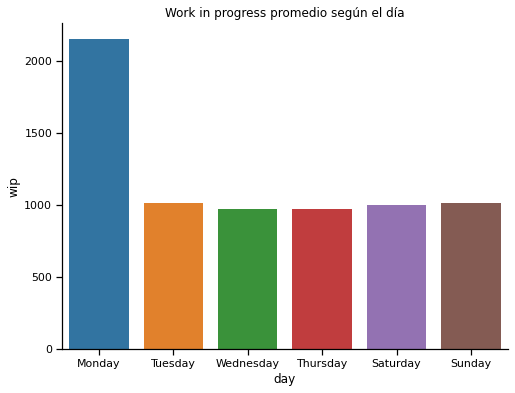

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(ax=ax, x=df_day.day, y=df_day.wip)
sns.set_context('notebook', font_scale=1.0)
sns.despine()
plt.title('Work in progress promedio según el día')
plt.show()

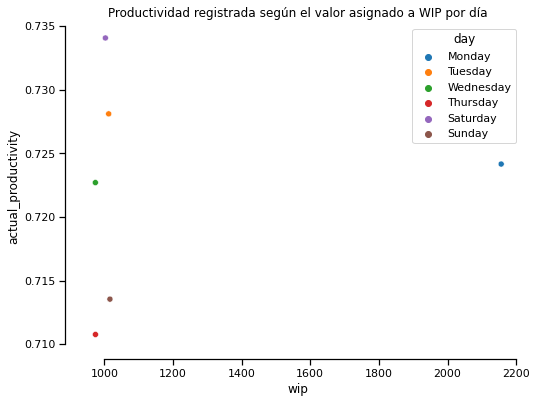

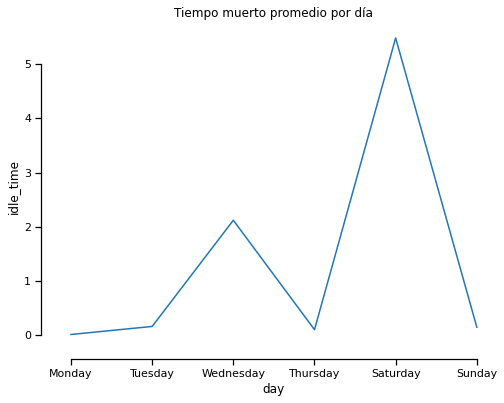

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(ax=ax, data=df_day, x='wip', y='actual_productivity', hue='day')
plt.title('Productividad registrada según el valor asignado a WIP por día')
sns.despine(offset=10, trim=True)
plt.show()
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(ax=ax, data=df_day, x='day', y='idle_time')
sns.despine(offset=10, trim=True)
plt.title('Tiempo muerto promedio por día')
plt.show()

En general, los datos parecen comportarse de una manera uniforme —independiente del día que se esté estudiando— . Sin embargo, sí se logran apreciar algunas pequeñas diferencias que deben tomarse en cuenta para el día sábado.

### 5.19 Exploración `targeted_productivity` y `actual_productivity`

Ambas variables se refieren al factor o porcentaje de productividad según la cantidad de trabajo ofrecida por los trabajadores en un determinado día. En particular, la variable `targeted_productivity` se refiere al porcentaje de trabajo completado esperado, mismo que es determinado por el líder del equipo. En cambio, la variable `actual_productivity` ya expresa la productividad final lograda por el equipo.



In [ ]:
basic_var_description('targeted_productivity', df)

---------------targeted_productivity---------------
Tipo de dato:	float64

Valores únicos:	[0.07, 0.35, 0.4, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8]

Valores nulos:	0

Estadísticas de la variable:
count    691.000000
mean       0.723980
std        0.102006
min        0.070000
25%        0.700000
50%        0.750000
75%        0.800000
max        0.800000
Name: targeted_productivity, dtype: float64

Histograma:



Correlación con la productividad:



Con las estadísticas y visualizaciones obtenidas, podemos observar que la variable `targeted_productivity` se encuentra por lo general entre valores determinados por el rango $[0.7, 0.8]$.

In [ ]:
basic_var_description('actual_productivity', df)

---------------actual_productivity---------------
Tipo de dato:	float64

Valores únicos (463):
	[0.233705 0.249417 0.251399 0.260979 0.263694 0.268214 0.283054 0.285333
 0.286985 0.295308]
	...
	[1.000066 1.00023  1.000345 1.000402 1.000446 1.000457 1.000602 1.000671
 1.050281 1.100484]
Valores nulos:	0

Estadísticas de la variable:
count    691.000000
mean       0.722013
std        0.154784
min        0.233705
25%        0.661470
50%        0.750608
75%        0.800402
max        1.100484
Name: actual_productivity, dtype: float64

Histograma:



In [ ]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   59 non-null     object 
 1   actual_productivity    59 non-null     float64
 2   targeted_productivity  59 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


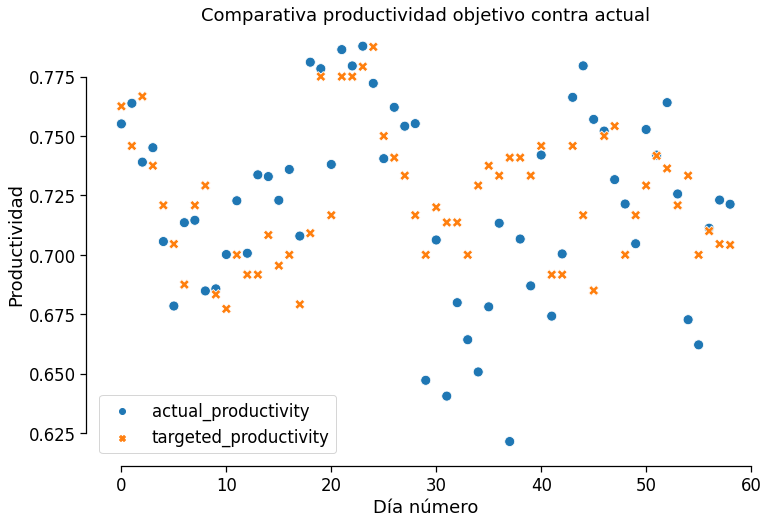

In [ ]:
df_prod = df[['date', 'actual_productivity', 'targeted_productivity']]
df_prod = df_prod.groupby(by=['date']).mean().reset_index()
df_prod['date'] = pd.to_datetime(df_prod['date'])
df_prod['date'] = df_prod['date'].dt.strftime('%y.%m.%d').astype(str)
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_context('notebook', font_scale=1.5)
sns.scatterplot(ax=ax, data=df_prod, s=100)
sns.despine(offset=5, trim=True)
ax.set_title('Comparativa productividad objetivo contra actual')
ax.set_xlabel('Día número')
ax.set_ylabel('Productividad')
plt.show()

Al comparar el histograma de la variable `actual_productivity` frente a `targeted_productivity`, observamos que el rango de la primera es mucho mayor. Es decir, los valores son más dispersos. Esto tiene sentido si consideramos que los valores fuera del rango de la segunda variable seguramente son producto de alguna anomalía en la producción que: incrementaron la productividad, o bien, la mermaron.

Si analizamos los valores percentiles de los estadísticos de la variable, no observamos gran cambio frente a la productividad objetivo. Considerando los datos con los que contamos, esto es una buena señal, dado que no se generan variaciones significativas de la productividad real frente la esperada.

Finalmente, las variaciones observadas en algunos valores deberán considerarse durante el modelado de los datos. En este análisis preliminar, se considera que seguramente será necesario introducir un parámetro que añada variaciones aleatorias a los resultados objetivo generados con el modelo. Esto, con tal de mejorar la veracidad de las predicciones.

### Codificación de variables categóricas

In [ ]:
df['day'] = LabelEncoder().fit_transform(df['day'])
df['quarter'] = LabelEncoder().fit_transform(df['quarter'])
df['department'] = LabelEncoder().fit_transform(df['department'])
df = df.drop(columns=['targeted_productivity', 'date'])
df.head()

,quarter,department,day,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,0,3,8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2,0,0,3,11,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,0,3,12,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,0,3,6,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,0,0,3,7,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125


### Exploremos los datos por posibles colinealidades entre las variables:

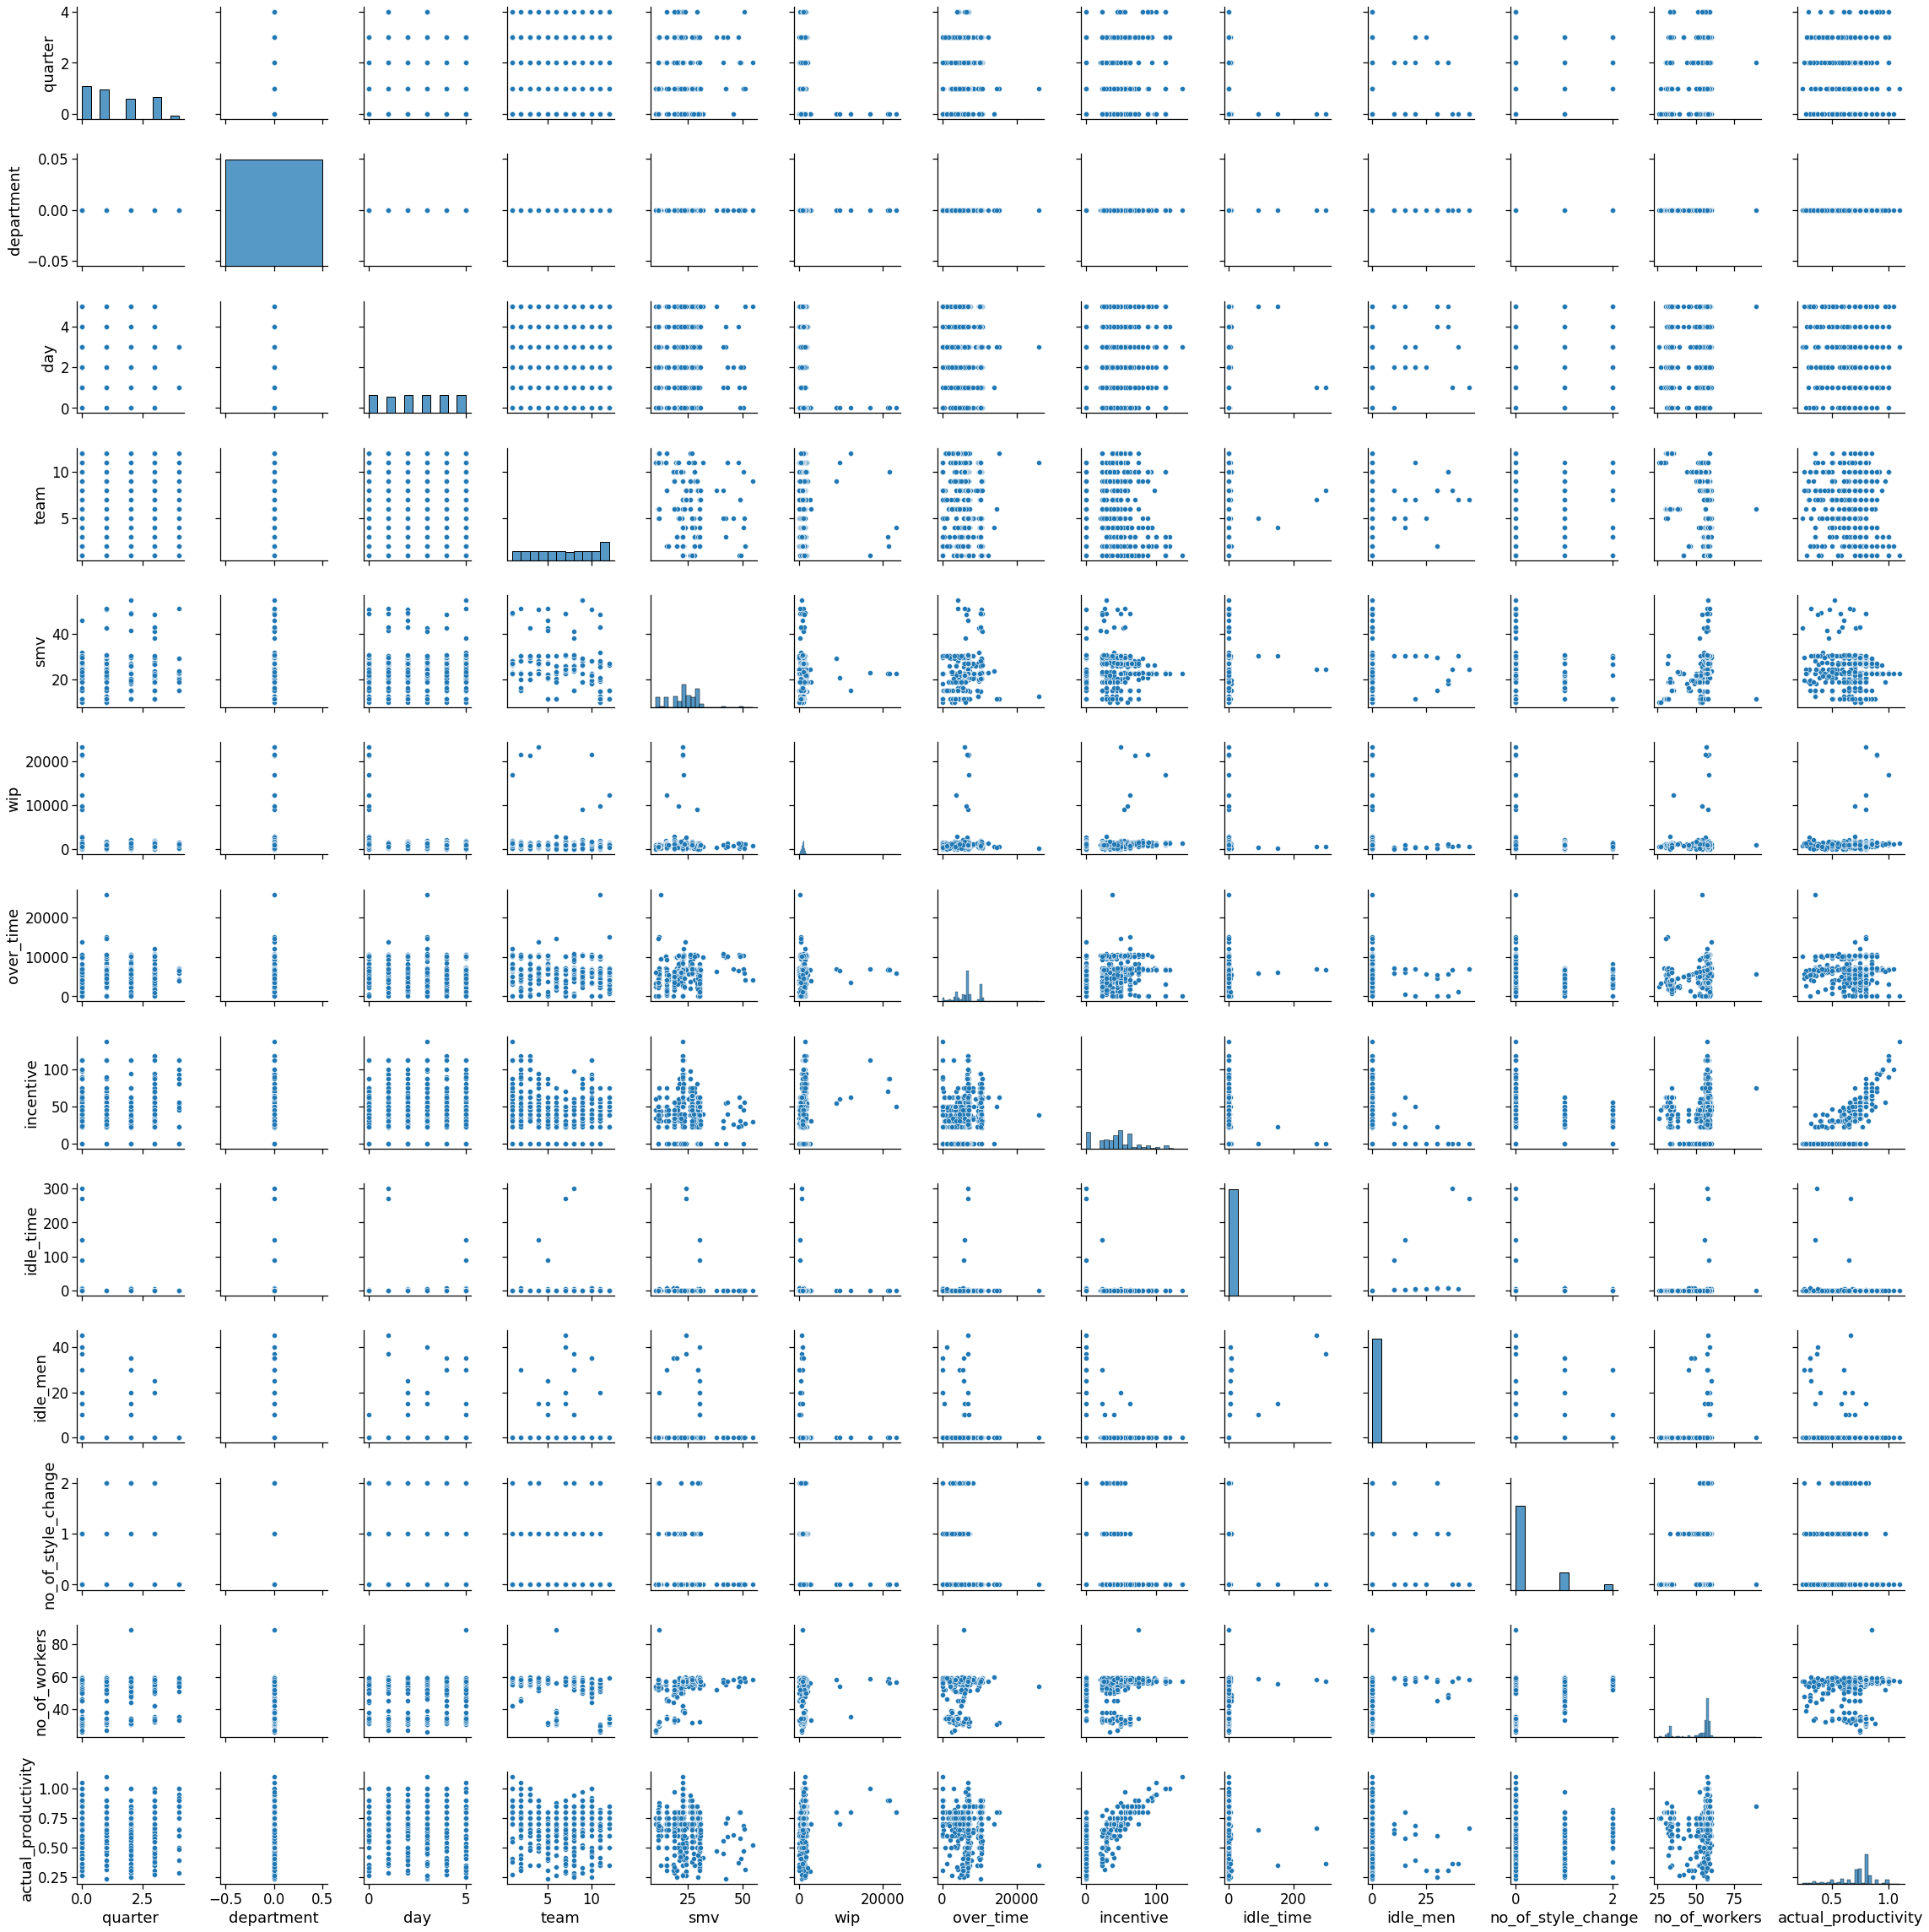

In [ ]:
sns.pairplot(df)

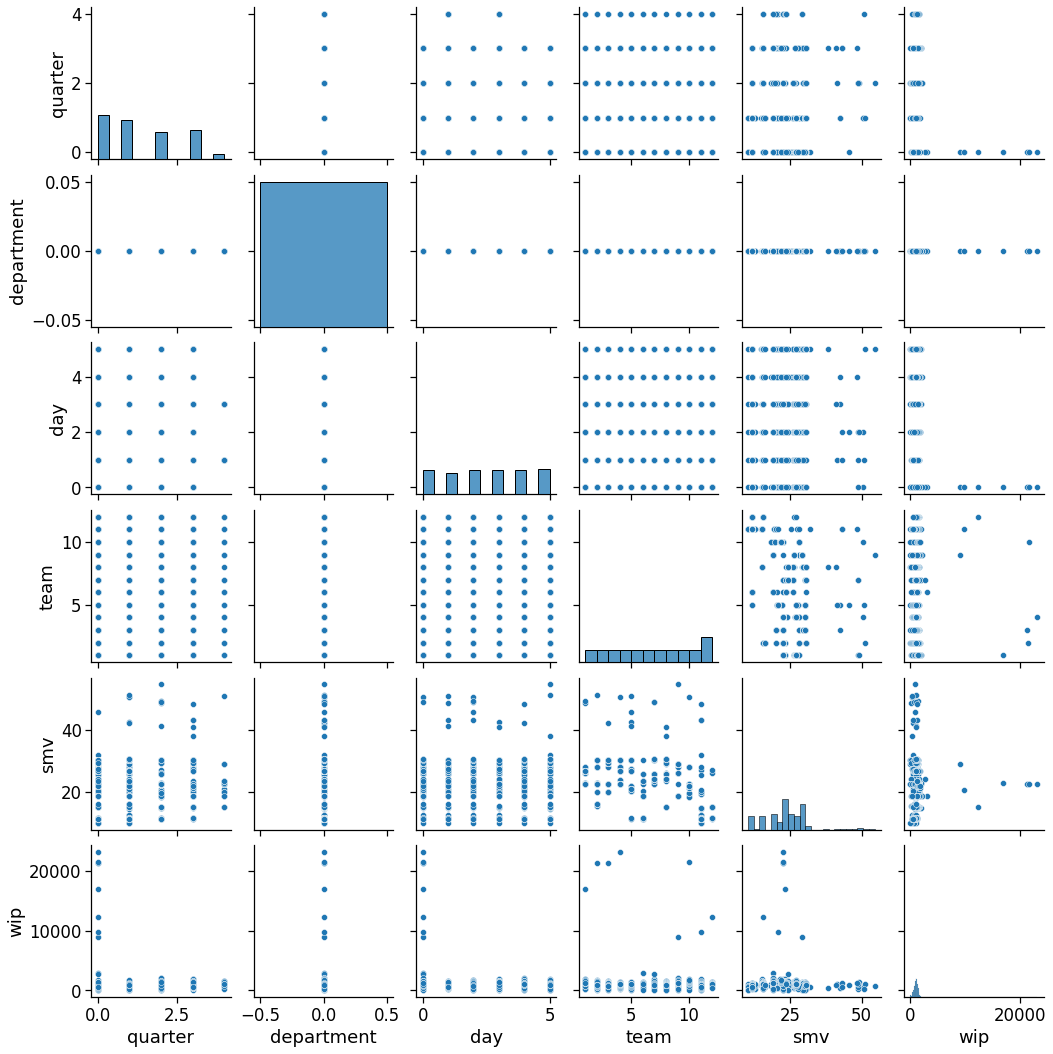

In [ ]:
sns.pairplot(df.iloc[:, :df.shape[1] // 2])
plt.show()

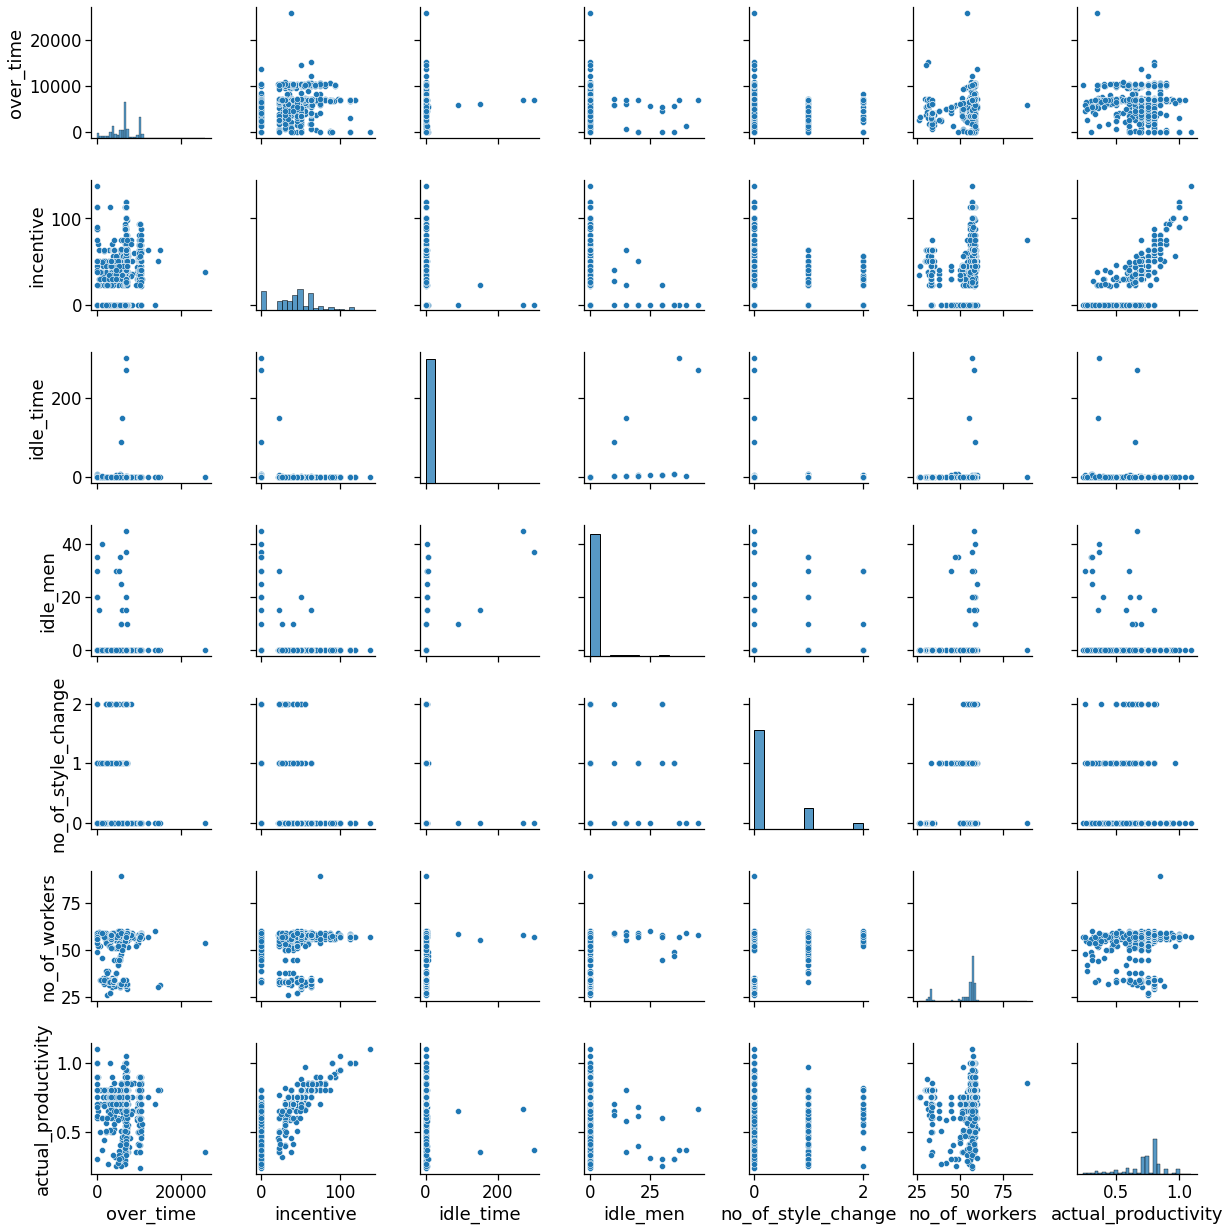

In [ ]:
sns.pairplot(df.iloc[:, df.shape[1] // 2:])
plt.show()

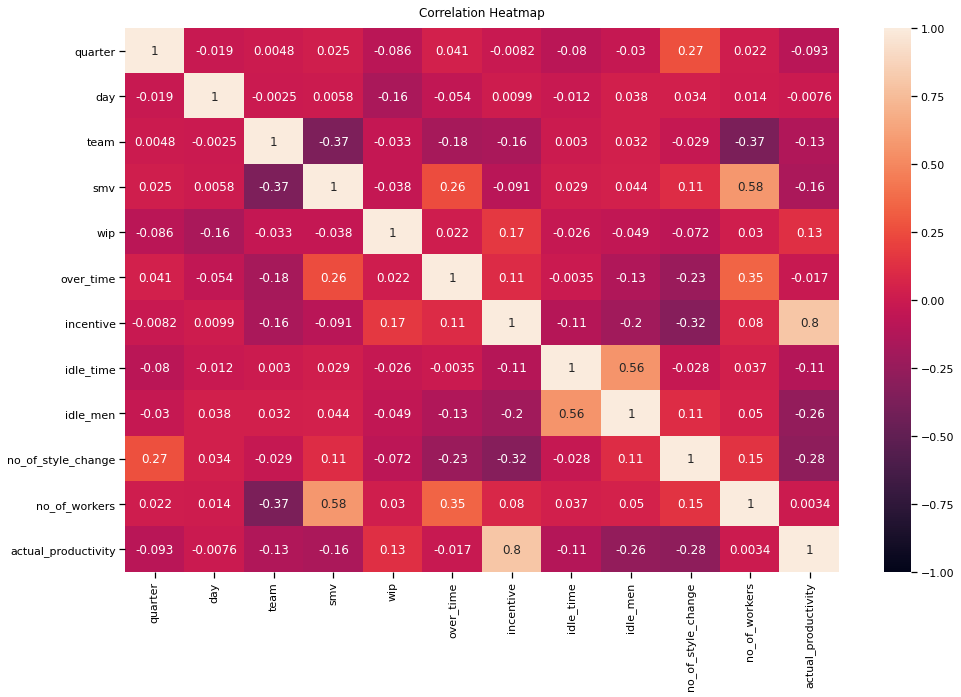

In [ ]:
plt.figure(figsize=(16, 10))
df_corr = df.drop(columns=['department'])
heatmap = sns.heatmap(df_corr.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

De este análisis podemos notar que hay variables altamente correlacionadas como lo son:
- El número de trabajadores y el SMV: $0.91$
- El número de trabajadores y el tiempo extra: $0.73$
- El tiempo extra y el SMV: $0.67$
- El idle men y el idle time: $0.56$

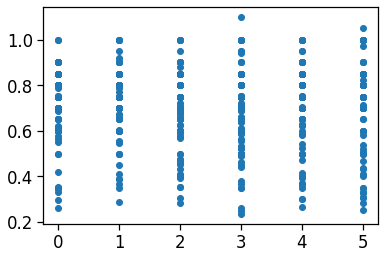

In [ ]:
plt.scatter(df['day'], df['actual_productivity'])
plt.show()

### Normalizamos

In [ ]:
def maxmin(column):
  max = np.max(column)
  min = np.min(column)
  column = (column-min)/(max-min)
  return column

In [ ]:
df_2 = df.copy()
df_2.team = maxmin(df.team)
df_2.wip = maxmin(df.wip)
df_2.incentive = maxmin(df.incentive)
df_2.idle_time = maxmin(df.idle_time)
df_2.no_of_style_change = maxmin(df.no_of_style_change)
df_2.no_of_workers = maxmin(df.no_of_workers)
df_2.actual_productivity = maxmin(df.actual_productivity)

In [ ]:
df_2 = df_2.drop(columns=['smv', 'team', 'idle_men'])

In [ ]:
df_2.head()

,quarter,department,day,wip,over_time,incentive,idle_time,no_of_style_change,no_of_workers,actual_productivity
0,0,0,3,0.047631,7080,0.710145,0.0,0.0,0.523810,0.815687
2,0,0,3,0.041575,3660,0.362319,0.0,0.0,0.071429,0.653991
3,0,0,3,0.041575,3660,0.362319,0.0,0.0,0.071429,0.653991
4,0,0,3,0.050314,1920,0.362319,0.0,0.0,0.476190,0.653773
5,0,0,3,0.042267,6720,0.275362,0.0,0.0,0.476190,0.653477


### División del dataset en **train** y **test**

In [ ]:
from sklearn.model_selection import  train_test_split
X, y = df_2.iloc[:, :-1], df_2.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}\ty_train: {y_train.shape}")
print(f"X_test: {X_test.shape}\ty_test: {y_test.shape}")

X_train: (552, 9)	y_train: (552,)
X_test: (139, 9)	y_test: (139,)


### Entrenamiento y evaluación de modelos

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [ ]:
models = [
          LinearRegression(),
          Ridge(alpha=0.5),
          Lasso(alpha=0.2),
          svm.SVR(),
          RandomForestRegressor()
]

names = [
         "Linear Regression",
         "Ridge",
         "Lasso",
         "SVM",
         "RandomForest"
]

In [ ]:
scores = []
for model in models:
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))
scores_df = pd.DataFrame({'model': names, 'score': scores})
scores_df = scores_df.sort_values(by='score', ascending=False)
scores_df

,model,score
4,RandomForest,0.677759
1,Ridge,0.656624
0,Linear Regression,0.655129
3,SVM,0.001621
2,Lasso,-0.012143


### Analizamos para cada cuarto y cada departamento

In [ ]:
deps_2 = df_2.department.unique()
quarters_2 = df_2.quarter.unique()

In [ ]:
for dep in deps_2:
  for quart in quarters_2:
    model = LinearRegression()
    print(deps[dep], quarters[quart])
    temp_df = df_2[(df_2.quarter == quart) & (df_2.department == dep)]
    temp_df = temp_df.iloc[:,:]
    
    x, y = temp_df.iloc[:, :-1], temp_df.iloc[:, -1]
    model.fit(x, y)

    r_sq = model.score(x, y)
    print("R²:", r_sq, "\n")

sweing Quarter1
R²: 0.7512613246481574 

sweing Quarter2
R²: 0.7038952210500601 

sweing Quarter3
R²: 0.6086235014749173 

sweing Quarter4
R²: 0.6377402950321056 

sweing Quarter5
R²: 0.9328685647309668 



In [ ]:
df_2.day = pd.factorize(df_2.day)[0]
df_2.quarter = pd.factorize(df_2.quarter)[0]
df_2.department = pd.factorize(df_2.department)[0]
df_2.day = pd.factorize(df_2.day)[0]
df_2

,quarter,department,day,wip,over_time,incentive,idle_time,no_of_style_change,no_of_workers,actual_productivity
0,0,0,0,0.047631,7080,0.710145,0.0,0.0,0.523810,0.815687
2,0,0,0,0.041575,3660,0.362319,0.0,0.0,0.071429,0.653991
3,0,0,0,0.041575,3660,0.362319,0.0,0.0,0.071429,0.653991
4,0,0,0,0.050314,1920,0.362319,0.0,0.0,0.476190,0.653773
5,0,0,0,0.042267,6720,0.275362,0.0,0.0,0.476190,0.653477
...,...,...,...,...,...,...,...,...,...,...
1187,1,0,5,0.045295,7080,0.326087,0.0,0.0,0.523810,0.595706
1188,1,0,5,0.042613,6960,0.217391,0.0,0.5,0.507937,0.538605
1189,1,0,5,0.039239,6840,0.217391,0.0,0.5,0.492063,0.538546
1190,1,0,5,0.048497,4560,0.289855,0.0,0.5,0.190476,0.538247


Probamos con etiquetas como categorías numéricas

In [ ]:
model_2 = LinearRegression()
x, y = df_2.iloc[:, :-1], df_2.iloc[:, -1]
model_2.fit(x, y)
r_sq = model_2.score(x, y)
r_sq

0.6660229524544454

## Conclusiones

En el presente trabajo se ha realizado un análisis exploratorio de las variables de una base de datos mediante la cual se realiza el seguimiento de la productividad de una empresa maquiladora de la industria textil. A partir de dicho análisis es que se puede partir a desarrollar un modelo que nos permita estimar la productividad a partir de las variables reportadas por los líderes de equipo en el área de producción de la fábrica.

Partiendo de la carga de los datos y su limpieza, continuamos con la generación de gráficas visualmente descriptivas para contar con el análisis categórico, uni-variado y bi-variado de las variables, según correspondía. Así, es que logramos determinar qué variables eran relevantes para poder desarrollar y entrenar un modelo lineal que nos llevara a ser capaces de estimar la productividad a partir de un subconjunto de datos.

Durante el desarrollo del trabajo, se llegaron a eliminar más del $42%$ de los registros, pues la variable *wip* no contaba con un valor asignado. Dichos registros se consideraron como los reportes de departamentos de la fábrica que actualmente no contaban con un trabajo asignado, por lo que los valores de productividad no iban a tener relevancia alguna. En específico, se concluyó que el departamento de *finishing* —dado que era el que más valores nulos reportó en el campo *wip*— es un área de trabajo que constantemente tiene que esperar la llegada de insumos de otras áreas.

Además de buscar correlaciones y dependencias entre las variables, se ha encontrado que no existe un proceso estacional entre los días, fechas o trimestre de trabajo con la productividad esperada y real. Es decir, la productividad obtenida en la fábrica es sumamente estándar, independientemente del día del que se trate.

Con los resultados obtenidos, lo que pudimos observar fue que las variables `incentive`, `no_of_style_change` e `idle_men` —ordenadas en orden descendente— son aquellas que tienen un mayor efecto en la productividad de la industria textil. Lo anterior, se puede concluir a partir del análisis exploratorio y visualización de la correlación entre variables.

Finalmente, nos parece lógico que tales variables sean las que afectan en gran medida la productividad. Para la primera, es entendible que los trabajadores sean más productivos si existe un incentivo para ello; en cuanto a `no_of_style_change`, se puede aseverar que —si aumenta la complejidad de un proceso industrial— el tiempo para llegar a un artículo final aumenta; el número de empleados ociosos, directamente relaciona la definición de la variable objetivo y provoca que aumenten o se reduzcan directamente las tasas de productividad.
